# Figures 3 & 4

In [1]:
import numpy as np
import pandas as pd
import numpy.random as npr
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle 

npr.seed(0)

In [2]:
from general_utilities import * #imports utilities.py file which has functions for plotting psychometrics and other useful things
from HMM_functions import * #imports HMM_functions.py file which has functions for getting the data read for the ssm.HMM
from functions_for_making_plots import * 
from decoder_functions import * #imports decoder_functions.py file which has functions for decoding things from neural data 
from data_extraction_for_svm import *

## Plotting preferences

In [3]:
colors = np.array([[0,102,51],[237,177,32],[233,0,111],[39,110,167]])/255

#Remove right and top spines from plots (personal preference)
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
dpi = 100

## Figure 3 B,C

In [4]:
# Define the filename from which to load the dictionary
filename = 'encoding_dict.pkl'

# Open the file in binary read mode and load the dictionary using pickle
with open(filename, 'rb') as file:
    encoding = pickle.load(file)

# Dynamically create variables from the dictionary keys
for key in encoding:
    globals()[key] = encoding[key]

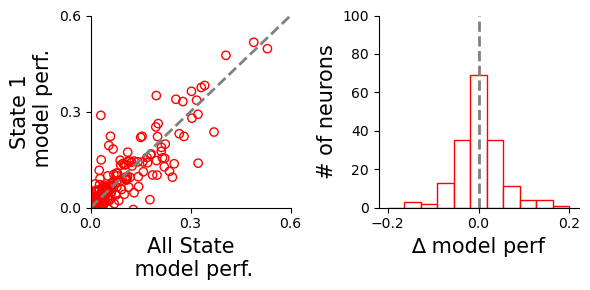

In [5]:
fig, axs = plt.subplots(1,2, figsize = (6,3), dpi=dpi)

axs[0].scatter(AC_All_state_fracdev, AC_State_1_frac_dev, facecolors='none', edgecolors='red')
axs[0].plot([0,1], linestyle='--', color='grey', lw=2)
axs[0].set_xlim([0,0.6])
axs[0].set_ylim([0,0.6])
axs[0].set_xticks([0,0.3,0.6])
axs[0].set_yticks([0,0.3,0.6])
axs[0].set_ylabel('State 1\n model perf.', fontsize=15)
axs[0].set_xlabel('All State\n model perf.', fontsize=15)

axs[1].hist(diff_AC, bins= 11, range=[-0.2,0.2], color='white', edgecolor='red')
axs[1].vlines(x=0, ymin=0, ymax=100, colors='grey', linestyles='--', lw=2)

axs[1].set_ylim([0, 100])
axs[1].set_ylabel('# of neurons', fontsize=15)
axs[1].set_xlabel('∆ model perf', fontsize=15)

fig.tight_layout()

#plt.savefig('AC_encoding_results.svg', format='svg', bbox_inches="tight")

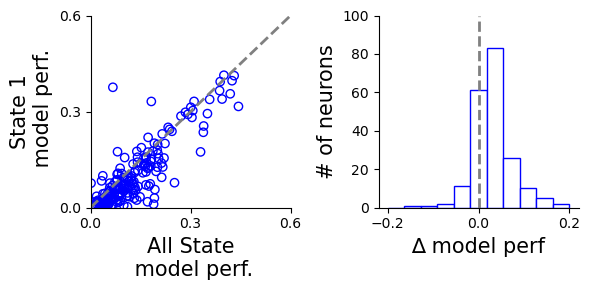

In [6]:
fig, axs = plt.subplots(1,2, figsize = (6,3), dpi=dpi)

axs[0].scatter(PPC_All_state_fracdev, PPC_State_1_frac_dev, facecolors='none', edgecolors='blue')
axs[0].plot([0,1], linestyle='--', color='grey', lw=2)
axs[0].set_xlim([0,0.6])
axs[0].set_ylim([0,0.6])
axs[0].set_xticks([0,0.3,0.6])
axs[0].set_yticks([0,0.3,0.6])
axs[0].set_ylabel('State 1\n model perf.', fontsize=15)
axs[0].set_xlabel('All State\n model perf.', fontsize=15)

axs[1].hist(diff_PPC, bins= 11, range=[-0.2,0.2], color='white', edgecolor='blue')
axs[1].vlines(x=0, ymin=0, ymax=100, colors='grey', linestyles='--', lw=2)

axs[1].set_ylim([0, 100])
axs[1].set_ylabel('# of neurons', fontsize=15)
axs[1].set_xlabel('∆ model perf', fontsize=15)

fig.tight_layout()

#plt.savefig('AC_encoding_results.svg', format='svg', bbox_inches="tight")


## Figure 3 D-F

In [20]:
# Define the filename from which to load the dictionary
filename = 'encoding_weights_dict.pkl'

# Open the file in binary read mode and load the dictionary using pickle
with open(filename, 'rb') as file:
    encoding_weights_dict = pickle.load(file)

# Dynamically create variables from the dictionary keys
for key in encoding_weights_dict:
    globals()[key] = encoding_weights_dict[key]

In [21]:
from scipy import stats

predictor_list = [0,2,4]
title_list = ['Sound Predictors', 'Position/Choice Predictors', 'Running velocity Predictors']

for x in [0,1,2]:
    AC_mean = [np.mean(AC_sum[predictor_list[x]]), np.mean(AC_sum[predictor_list[x]+1])]
    print(f"{title_list[x]} : {AC_mean}")
    data1, data2 = figure_functions.stats_weights(AC_sum[predictor_list[x]], AC_sum[predictor_list[x]+1])
    t_stat, p_value = stats.ttest_ind(data1, data2)
    print(f"One-Sample t-Test statistic: {t_stat}, P-value: {p_value}")

Sound Predictors : [37.373726, 34.173725]
One-Sample t-Test statistic: 0.5118609856086, P-value: 0.6149708950753439
Position/Choice Predictors : [16.721025, 20.33458]
One-Sample t-Test statistic: -2.720521227374007, P-value: 0.01402624358732969
Running velocity Predictors : [10.414505, 12.3202095]
One-Sample t-Test statistic: -3.0750663301658294, P-value: 0.006525455380159776


In [22]:
for x in [0,1,2]:
    PPC_mean = [np.mean(PPC_sum[predictor_list[x]]), np.mean(PPC_sum[predictor_list[x]+1])]
    print(f"{title_list[x]} : {PPC_mean}")
    data1, data2 = figure_functions.stats_weights(PPC_sum[predictor_list[x]], PPC_sum[predictor_list[x]+1])
    t_stat, p_value = stats.ttest_ind(data1, data2)
    print(f"One-Sample t-Test statistic: {t_stat}, P-value: {p_value}")

Sound Predictors : [12.685931, 34.471367]
One-Sample t-Test statistic: -3.128080182791237, P-value: 0.00581092324952626
Position/Choice Predictors : [13.159961, 21.18207]
One-Sample t-Test statistic: -3.1232135248945663, P-value: 0.005873197886620604
Running velocity Predictors : [7.89591, 11.519829]
One-Sample t-Test statistic: -2.5606929473293447, P-value: 0.01965512343662318


/var/folders/tb/ct0s7r6j0q90l_p7cs6hshr80000gn/T/ipykernel_66996/1272268651.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(['State 1', 'All State'], rotation=45, fontsize=15)


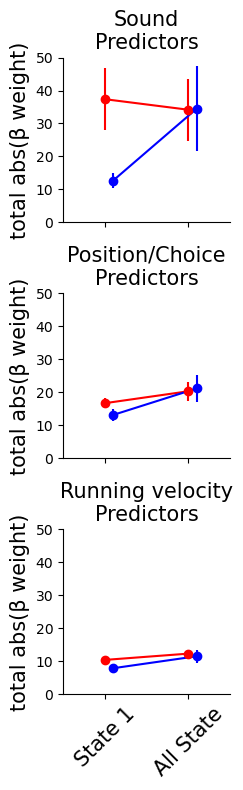

In [10]:
fig, axs = plt.subplots(3, 1, figsize = (2.5,8), dpi=dpi, sharey=False)

predictor_list = [0,2,4]
title_list = ['Sound\nPredictors', 'Position/Choice\nPredictors', 'Running velocity\nPredictors']
for x in [0,1,2]:
    AC_mean = [np.mean(AC_sum[predictor_list[x]]), np.mean(AC_sum[predictor_list[x]+1])]
    AC_error = scipy.stats.sem(AC_sum[predictor_list[x]]), scipy.stats.sem(AC_sum[predictor_list[x]+1])
    axs[x].errorbar(x=[1,2], y=AC_mean, yerr=AC_error, fmt='o', color='red')
    axs[x].plot([1,2], AC_mean, color='red')

    PPC_mean = [np.mean(PPC_sum[predictor_list[x]]), np.mean(PPC_sum[predictor_list[x]+1])]
    PPC_error = scipy.stats.sem(PPC_sum[predictor_list[x]]), scipy.stats.sem(PPC_sum[predictor_list[x]+1])
    axs[x].errorbar(x=[1.1,2.1], y=PPC_mean, yerr=PPC_error, fmt='o', color='blue')
    axs[x].plot([1.1,2.1], PPC_mean, color='blue')

    axs[x].set_xticks(list(range(1,3)))
    axs[x].set_xticklabels([], rotation=45, fontsize=15)
    axs[2].set_xticklabels(['State 1', 'All State'], rotation=45, fontsize=15)
    axs[x].set_ylabel('total abs(β weight)', fontsize=15)
    axs[x].set_title(title_list[x], fontsize=15)
    axs[x].set_xlim([0.5,2.5])
    axs[x].set_ylim([0,50])

fig.tight_layout()